In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
data=pd.read_csv('all_weekly_excess_deaths.csv')

In [4]:
data

country         region  region_code  start_date    end_date  days  \
0         Australia      Australia            0  2019-12-30  2020-01-05     7   
1         Australia      Australia            0  2020-01-06  2020-01-12     7   
2         Australia      Australia            0  2020-01-13  2020-01-19     7   
3         Australia      Australia            0  2020-01-20  2020-01-26     7   
4         Australia      Australia            0  2020-01-27  2020-02-02     7   
...             ...            ...          ...         ...         ...   ...   
5765  United States  United States            0  2022-05-09  2022-05-15     7   
5766  United States  United States            0  2022-05-16  2022-05-22     7   
5767  United States  United States            0  2022-05-23  2022-05-29     7   
5768  United States  United States            0  2022-05-30  2022-06-05     7   
5769  United States  United States            0  2022-06-06  2022-06-12     7   

      year  week  population  total_deaths  covid_deaths  expected_deaths  \
0     2020     1    25921089        2926.0             0      2965.372893   
1     2020     2    25921089        2902.0             0      2956.539560   
2     2020     3    25921089        2914.0             0      2932.039560   
3     2020     4    25921089        3007.0             0      2940.372893   
4     2020     5    25921089        2910.0             0      2900.039560   
...    ...   ...         ...           ...           ...              ...   
5765  2022    19   336997624       57864.0          1868     55510.914407   
5766  2022    20   336997624       57523.0          2461     54958.314407   
5767  2022    21   336997624       56959.0          2607     54850.514407   
5768  2022    22   336997624       57545.0          1956     54459.714407   
5769  2022    23   336997624       57710.0          2770     54923.314407   

      excess_deaths  non_covid_deaths  covid_deaths_per_100k  \
0        -39.372893            2926.0               0.000000   
1        -54.539560            2902.0               0.000000   
2        -18.039560            2914.0               0.000000   
3         66.627107            3007.0               0.000000   
4          9.960440            2910.0               0.000000   
...             ...               ...                    ...   
5765    2353.085593           55996.0               0.554307   
5766    2564.685593           55062.0               0.730272   
5767    2108.485593           54352.0               0.773596   
5768    3085.285593           55589.0               0.580420   
5769    2786.685593           54940.0               0.821964   

      excess_deaths_per_100k  excess_deaths_pct_change  
0                  -0.151895                 -0.013278  
1                  -0.210406                 -0.018447  
2                  -0.069594                 -0.006153  
3                   0.257038                  0.022659  
4                   0.038426                  0.003435  
...                      ...                       ...  
5765                0.698250                  0.042390  
5766                0.761040                  0.046666  
5767                0.625668                  0.038441  
5768                0.915521                  0.056653  
5769                0.826916                  0.050738  

[5770 rows x 17 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   5770 non-null   object 
 1   region                    5770 non-null   object 
 2   region_code               5770 non-null   int64  
 3   start_date                5770 non-null   object 
 4   end_date                  5770 non-null   object 
 5   days                      5770 non-null   int64  
 6   year                      5770 non-null   int64  
 7   week                      5770 non-null   int64  
 8   population                5770 non-null   int64  
 9   total_deaths              5770 non-null   float64
 10  covid_deaths              5770 non-null   int64  
 11  expected_deaths           5770 non-null   float64
 12  excess_deaths             5770 non-null   float64
 13  non_covid_deaths          5770 non-null   float64
 14  covid_de

In [6]:
data.columns

Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'days',
       'year', 'week', 'population', 'total_deaths', 'covid_deaths',
       'expected_deaths', 'excess_deaths', 'non_covid_deaths',
       'covid_deaths_per_100k', 'excess_deaths_per_100k',
       'excess_deaths_pct_change'],
      dtype='object')

In [7]:
data.isnull().sum()# no missing value found

country                     0
region                      0
region_code                 0
start_date                  0
end_date                    0
days                        0
year                        0
week                        0
population                  0
total_deaths                0
covid_deaths                0
expected_deaths             0
excess_deaths               0
non_covid_deaths            0
covid_deaths_per_100k       0
excess_deaths_per_100k      0
excess_deaths_pct_change    0
dtype: int64

In [8]:
data.describe()

region_code    days         year         week    population  \
count       5770.0  5770.0  5770.000000  5770.000000  5.770000e+03   
mean           0.0     7.0  2020.750433    24.220624  3.120102e+07   
std            0.0     0.0     0.730038    15.089277  5.401340e+07   
min            0.0     7.0  2020.000000     1.000000  3.703350e+05   
25%            0.0     7.0  2020.000000    11.000000  5.403021e+06   
50%            0.0     7.0  2021.000000    22.000000  1.046710e+07   
75%            0.0     7.0  2021.000000    37.000000  3.830773e+07   
max            0.0     7.0  2022.000000    53.000000  3.369976e+08   

       total_deaths  covid_deaths  expected_deaths  excess_deaths  \
count   5770.000000   5770.000000      5770.000000    5770.000000   
mean    5697.674385    586.102426      4925.623684     772.050700   
std    10510.772931   1653.624735      8940.263278    2334.268651   
min       28.000000      0.000000        36.958708   -3884.712360   
25%      953.250000      7.000000       867.375983      -0.516362   
50%     2203.850000     71.000000      1978.483427     100.641011   
75%     6433.250000    405.750000      5687.962381     553.124692   
max    87417.000000  23386.000000     64029.902966   28233.523876   

       non_covid_deaths  covid_deaths_per_100k  excess_deaths_per_100k  \
count       5770.000000            5770.000000             5770.000000   
mean        5111.571958               1.779043                2.341445   
std         9220.806975               2.629101                4.210041   
min           28.000000               0.000000               -8.776743   
25%          882.000000               0.112374               -0.009925   
50%         2042.500000               0.719079                1.144515   
75%         5840.750000               2.339688                3.192287   
max        70577.000000              19.562486               38.801037   

       excess_deaths_pct_change  
count               5770.000000  
mean                   0.142107  
std                    0.255349  
min                   -0.390527  
25%                   -0.000743  
50%                    0.071504  
75%                    0.193627  
max                    3.782780

In [9]:
data['covid_death_percent']=data['covid_deaths']/data['total_deaths']*100
data['covid_death_rate(per_day)']=data['covid_deaths']/data['days']

In [10]:
data['country'].value_counts()

country
South Africa      134
Ecuador           133
Colombia          132
Denmark           132
Iran              132
Chile             132
Peru              132
Netherlands       132
Norway            132
Germany           131
Estonia           131
Israel            131
Austria           131
Britain           131
New Zealand       131
Portugal          131
Poland            130
Switzerland       130
Latvia            130
Slovenia          129
Belgium           129
Malta             128
United States     128
Sweden            128
France            128
Lithuania         128
Croatia           127
Bulgaria          127
Finland           127
Cyprus            127
Greece            127
Hungary           127
Iceland           127
Luxembourg        127
Spain             126
Romania           126
Czech Republic    126
Slovakia          124
Mexico            124
Italy             122
South Korea       122
Australia         117
Canada            113
Guatemala         104
Montenegro         96
Tu

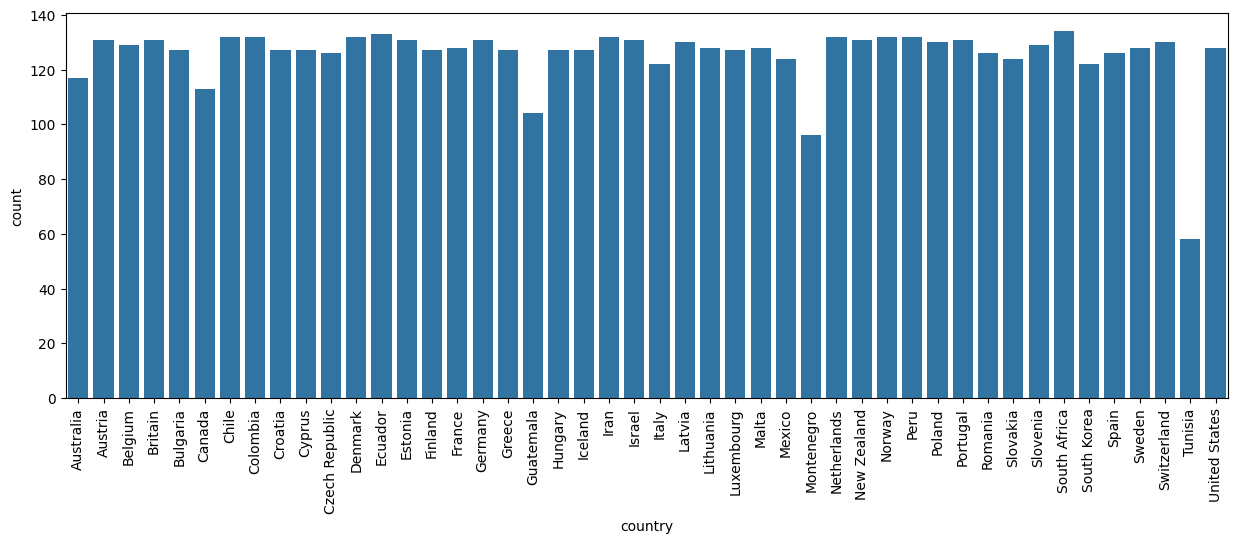

In [11]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=data,x='country',ax=ax)
plt.xticks(rotation=90)
plt.show()

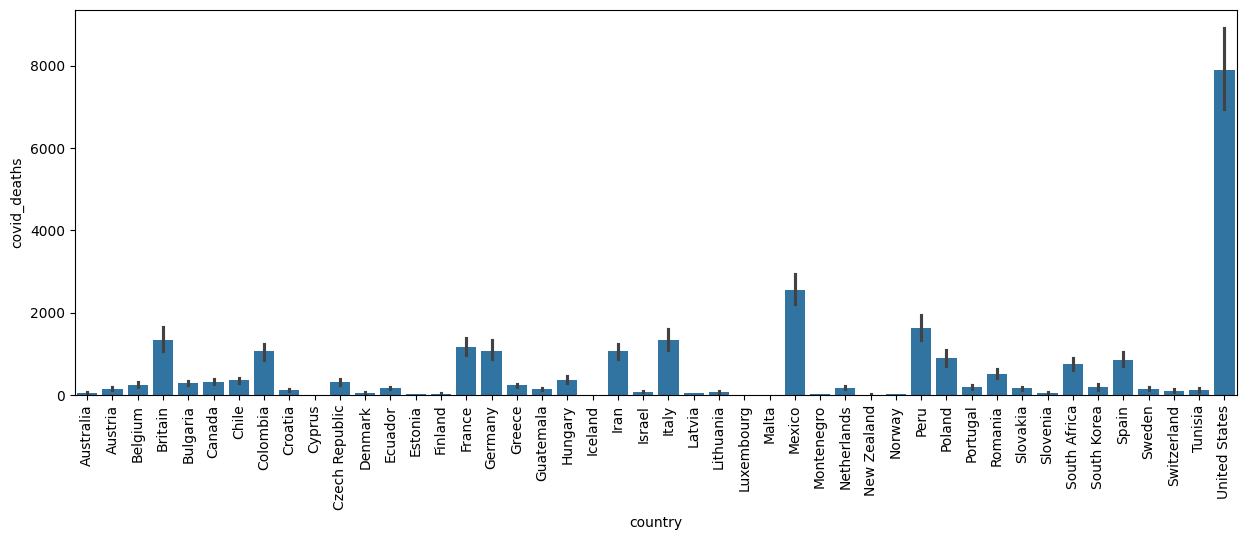

In [12]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=data,x='country',y='covid_deaths')
plt.xticks(rotation=90)
plt.show()

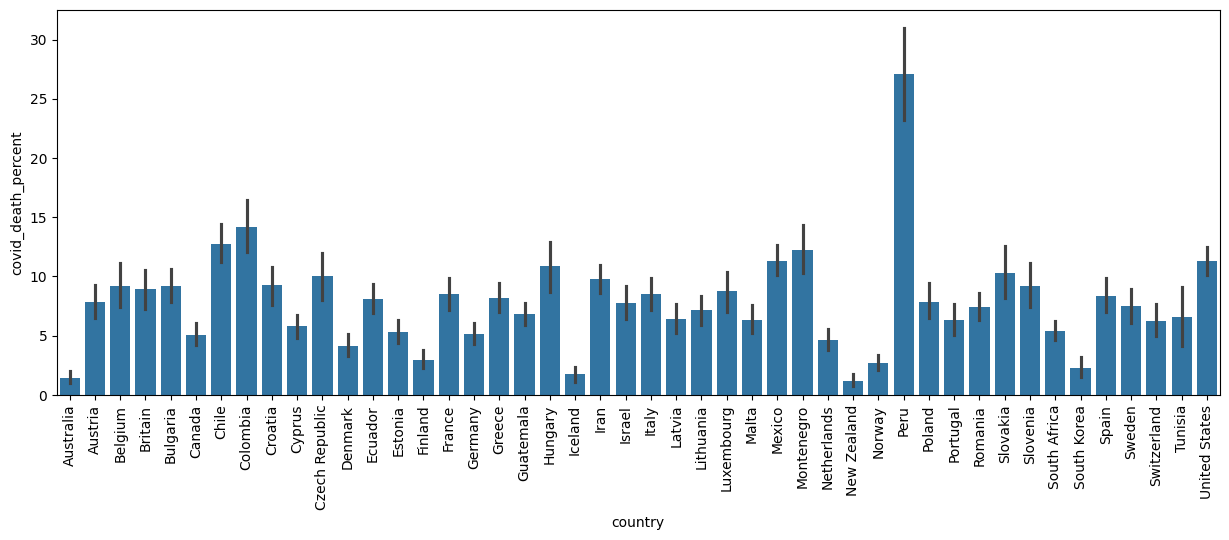

In [13]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=data,x='country',y='covid_death_percent')
plt.xticks(rotation=90)
plt.show()

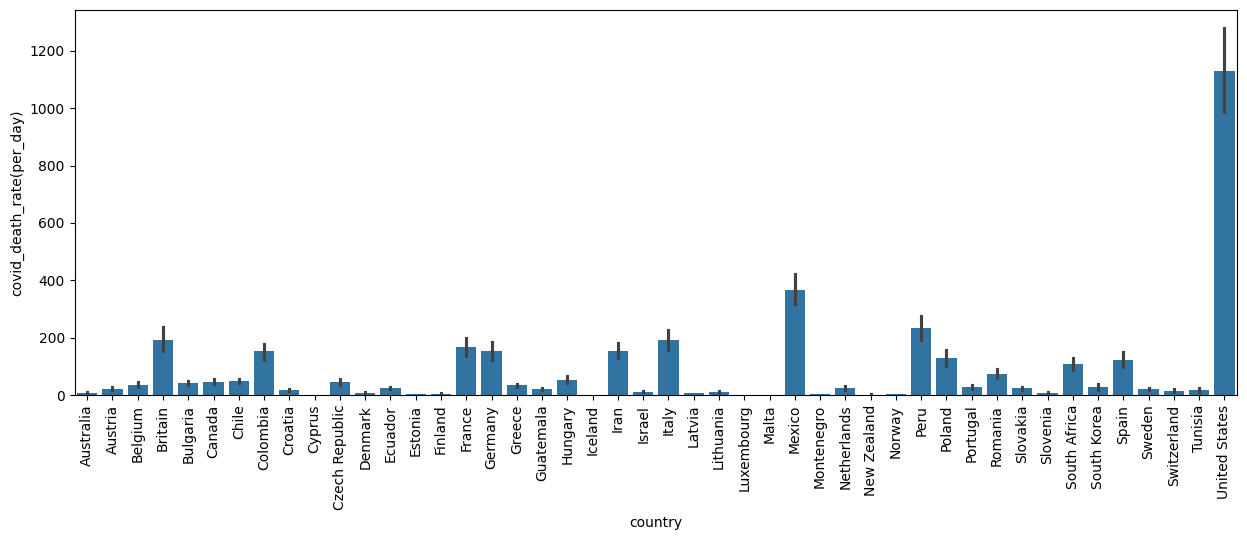

In [14]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=data,x='country',y='covid_death_rate(per_day)')
plt.xticks(rotation=90)
plt.show()

In [15]:
fig=px.choropleth(data_frame=data,locations='country',locationmode='country names',color='covid_deaths'
                  ,animation_frame='end_date')
fig.write_html("choropleth.html")

In [16]:
fig=px.choropleth(data_frame=data,locations='country',locationmode='country names',color='covid_death_percent'
                  ,animation_frame='end_date')
fig.write_html("choropleth2.html")

In [17]:
# Chọn các cột có ý nghĩa để phân nhóm
features = data[['total_deaths', 'covid_death_percent']].dropna()

# Chuẩn hóa dữ liệu để đảm bảo cân bằng giữa các đơn vị đo lường
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [18]:
# Áp dụng K-Means với k=3 nhóm (có thể thay đổi số cụm tùy vào dữ liệu)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)


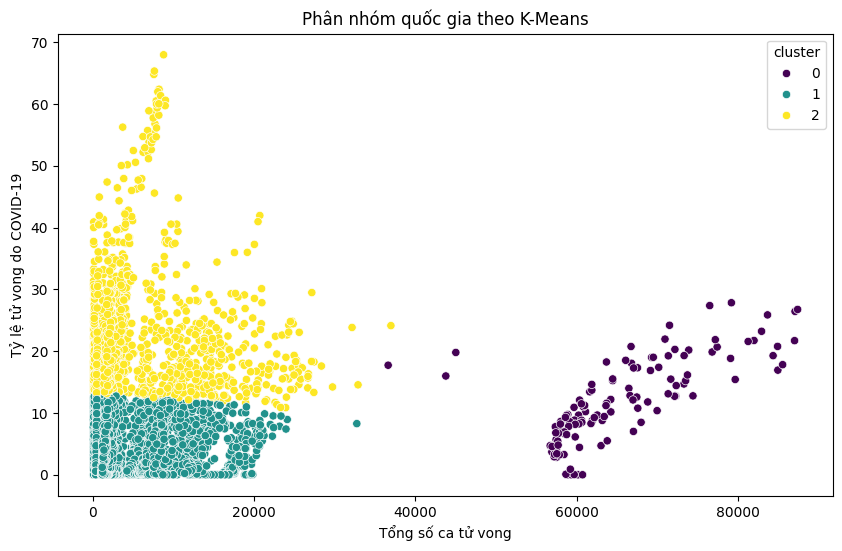

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['total_deaths'], y=data['covid_death_percent'], hue=data['cluster'], palette='viridis')
plt.title('Phân nhóm quốc gia theo K-Means')
plt.xlabel('Tổng số ca tử vong')
plt.ylabel('Tỷ lệ tử vong do COVID-19')
plt.show()
